In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

## Import Libraries

In [2]:
df = pd.read_csv("data/Crime_Data_from_2020_to_Present.csv", low_memory=False)

## Data ScaN

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [5]:
df.sample(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
428431,230305153,01/24/2023 12:00:00 AM,01/24/2022 12:00:00 AM,1530,3,Southwest,358,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,522.0,NaN,NaN,NaN,1200 W 34TH ST,NaN,34.0219,-118.2822
588101,221322845,12/24/2022 12:00:00 AM,12/24/2022 12:00:00 AM,1630,13,Newton,1383,2,901,VIOLATION OF RESTRAINING ORDER,2038 0913 0602,0,F,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other,901.0,NaN,NaN,NaN,5800 BRENTWOOD ST,NaN,33.9869,-118.2772
112682,202009478,05/07/2020 12:00:00 AM,04/28/2020 12:00:00 AM,1600,20,Olympic,2036,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0377 1822 0344 2032 0202,25,M,O,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,700 S BERENDO ST,NaN,34.0598,-118.2941
576806,220416151,12/09/2022 12:00:00 AM,12/01/2022 12:00:00 AM,628,4,Hollenbeck,412,2,354,THEFT OF IDENTITY,0100,73,F,K,605.0,AUTOMATED TELLER MACHINE (ATM),NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,200 N AVENUE 25,NaN,34.0780,-118.2181
366885,212117249,12/05/2021 12:00:00 AM,12/05/2021 12:00:00 AM,630,21,Topanga,2161,1,330,BURGLARY FROM VEHICLE,0344,48,F,H,101.0,STREET,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,5700 WILHELMINA AV,NaN,34.1736,-118.6491


In [6]:
df.shape

(990293, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990293 entries, 0 to 990292
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           990293 non-null  int64  
 1   Date Rptd       990293 non-null  object 
 2   DATE OCC        990293 non-null  object 
 3   TIME OCC        990293 non-null  int64  
 4   AREA            990293 non-null  int64  
 5   AREA NAME       990293 non-null  object 
 6   Rpt Dist No     990293 non-null  int64  
 7   Part 1-2        990293 non-null  int64  
 8   Crm Cd          990293 non-null  int64  
 9   Crm Cd Desc     990293 non-null  object 
 10  Mocodes         842641 non-null  object 
 11  Vict Age        990293 non-null  int64  
 12  Vict Sex        849515 non-null  object 
 13  Vict Descent    849504 non-null  object 
 14  Premis Cd       989970 non-null  float64
 15  Premis Desc     989399 non-null  object 
 16  Weapon Used Cd  326547 non-null  float64
 17  Weapon Des

# Data Cleaning

### Rename Columns

In [8]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [9]:
# New column names with lowercase and underscores
new_columns = [
    'report_number', 'date_reported', 'date_of_occurrence', 'time_of_occurrence', 
    'area_code', 'area_name', 'report_district_number', 'part_1_or_2', 
    'crime_code', 'crime_code_description', 'mocodes', 'victim_age', 
    'victim_sex', 'victim_descent', 'premise_code', 'premise_description', 
    'weapon_used_code', 'weapon_description', 'crime_status', 'crime_status_description',
    'crime_code_1', 'crime_code_2', 'crime_code_3', 'crime_code_4', 
    'location', 'cross_street', 'latitude', 'longitude'
]

# Rename columns using the new column names
df.columns = new_columns

### Missing Values

In [10]:
df.isnull().sum()

report_number                    0
date_reported                    0
date_of_occurrence               0
time_of_occurrence               0
area_code                        0
area_name                        0
report_district_number           0
part_1_or_2                      0
crime_code                       0
crime_code_description           0
mocodes                     147652
victim_age                       0
victim_sex                  140778
victim_descent              140789
premise_code                   323
premise_description            894
weapon_used_code            663746
weapon_description          663746
crime_status                     1
crime_status_description         0
crime_code_1                    11
crime_code_2                921336
crime_code_3                987982
crime_code_4                990229
location                         0
cross_street                837652
latitude                         0
longitude                        0
dtype: int64

In [11]:
round(df.isna().mean() * 100,2)

report_number                0.00
date_reported                0.00
date_of_occurrence           0.00
time_of_occurrence           0.00
area_code                    0.00
area_name                    0.00
report_district_number       0.00
part_1_or_2                  0.00
crime_code                   0.00
crime_code_description       0.00
mocodes                     14.91
victim_age                   0.00
victim_sex                  14.22
victim_descent              14.22
premise_code                 0.03
premise_description          0.09
weapon_used_code            67.03
weapon_description          67.03
crime_status                 0.00
crime_status_description     0.00
crime_code_1                 0.00
crime_code_2                93.04
crime_code_3                99.77
crime_code_4                99.99
location                     0.00
cross_street                84.59
latitude                     0.00
longitude                    0.00
dtype: float64

#### assuming we want to clean null values by droping all rows containing null values

In [12]:
# Remove rows with any missing values
df_cleaned = df.dropna()

# Remove rows with missing values in specific columns (e.g., 'date_reported')
# df_cleaned = df.dropna(subset=['date_reported', 'victim_age'])

# Check the shape of the DataFrame before and after cleaning
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (990293, 28)
Cleaned shape: (10, 28)


looking at the dataset, we can just go ahead and and work with the data as the null values for some are justifiable<br>
drop the row with the blank crime status and crime code, premise code and premise description<br>
we can fill the sex, descent with "unknown"<br>

#### dropping rows with null values fr some columns

In [13]:
df.dropna(subset=['crime_status'], inplace=True)
df.dropna(subset=['premise_code'], inplace=True)
df.dropna(subset=['premise_description'], inplace=True)

fill the sex, descent with "unknown"

#### filling up null values with actual values like "Unknown" for columns where 

In [14]:
#fill null with "Unknown"
df['victim_sex'] = df['victim_sex'].fillna('Unknown')
df['victim_descent'] = df['victim_descent'].fillna('Unknown')

In [15]:
#fill null with with No weapon
df['weapon_used_code'] = df['weapon_used_code'].fillna(0)
df['weapon_description'] = df['weapon_description'].fillna('No Weapon')

#### drop unnecessary columns

the mocodes can be an important column, however it contains, for sum rows, about 10 codes which will make analysis fruitless in some sense<br>
to convert these codes into the description is necessary<br>
for this analysis though, we dont need the column<br>
<br>
we wont be doing any advance <strong>geospatial analysis</strong> too so we dont need the <strong>cross_street column</strong><br>
the extra crime_code columns are also only necessary for multicrime analysis, since the null values are more than 90% for three and we have an actual crime code column, we can drop the columns

In [16]:
df.drop("mocodes", axis=1, inplace=True)
df.drop("cross_street", axis=1, inplace=True)
df.drop("crime_code_1", axis=1, inplace=True)
df.drop("crime_code_2", axis=1, inplace=True)
df.drop("crime_code_3", axis=1, inplace=True)
df.drop("crime_code_4", axis=1, inplace=True)

uniques for crime_status_description

#### clean and corrrect time and date columns

convert date columns to date dtype

In [17]:
#change data_reported column to date dtype
df['date_reported'] = pd.to_datetime(df['date_reported'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.date

#change date_of_occurrence column to date dtype
df['date_of_occurrence'] = pd.to_datetime(df['date_of_occurrence'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.date

for the time column there are 1, 2, 3 and 4 digit values making the conversion a bit odd<br>
we have to treat it differently

In [18]:
# Convert each time entry into a standardized time format 'HH:MM'
def standardize_time(x):
    x = str(x)  # Convert to string for easier manipulation
    if len(x) == 4:  # 4-digit format: HHMM
        return f"{x[:2]}:{x[2:]}"
    elif len(x) == 3:  # 3-digit format: HMM
        return f"{x[0]}:{x[1:]}"
    elif len(x) == 1 or len(x) == 2:  # 1 or 2 digit format: H
        return f"{x}:00"
    else:
        return None  # In case of invalid time format

# Apply the function to the column
df['time_of_occurrence'] = df['time_of_occurrence'].apply(standardize_time)

# Now, convert to datetime and extract time
df['time_of_occurrence'] = pd.to_datetime(df['time_of_occurrence'], format='%H:%M', errors='coerce').dt.time

#correct NaT values by making it 00:00:00
df['time_of_occurrence'] = df['time_of_occurrence'].fillna(pd.Timestamp("00:00:00").time())

#### Check Unique values to find inconsistencies

CRIME STATUS DESCRIPTION

In [19]:
df['crime_status_description'].unique()

array(['Adult Arrest', 'Invest Cont', 'Adult Other', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

let's use data that is more readable and understandable<br>
dictionary below was obtained from the web

In [20]:
# Mapping of crime status codes to their meanings
crime_status_mapping = {
    'AA': 'Arrest Made',
    'IC': 'Investigation Continuing',
    'AO': 'Arrest Outstanding',
    'JA': 'Juvenile Arrest',
    'JO': 'Juvenile Outstanding',
    'CC': 'Case Closed'
}

# Apply the mapping to the 'crime_status' column to create a new 'crime_status_description' column
df['crime_status_description'] = df['crime_status'].map(crime_status_mapping)

let's check the unique vales for the columns so we can make some corrections if necessary

VICTIM AGE COLUMN

In [21]:
df.victim_age.unique()

array([  0,  47,  19,  28,  41,  25,  27,  24,  26,   8,   7,  56,  22,
        23,  31,  30,  57,  12,  46,  51,  37,  20,  29,  33,  34,  15,
        65,  59,   9,  35,  50,  64,  79,  40,  44,  32,  16,  21,   6,
        72,  10,  60,  36,  18,  63,  17,   5,  39,  62,  42,  58,  45,
        54,  14,  71,  69,  49,  38,  13,  61,  -2,  43,  78,  67,  53,
        11,  48,  73,  52,  68,  81,  80,   3,  55,  89,  70,  77,  83,
        91,  82,  75,  76,  74,  -1,   2,  66,  84,  -3,   4,  87,  86,
        85,  90,  99,  96,  88,  92,  94,  93,  95,  97,  98, 120,  -4])

negative and 0 ages should be changed to unknown

In [22]:
df["victim_age"] = df["victim_age"].apply(lambda x : "Unknown" if x<= 0 else x)

VICTIM DESCENT

In [23]:
df.victim_descent.unique()

array(['O', 'X', 'H', 'B', 'W', 'Unknown', 'A', 'K', 'C', 'J', 'F', 'I',
       'V', 'S', 'P', 'Z', 'G', 'U', 'D', 'L', '-'], dtype=object)

In [24]:
descent_mapping = {
    'O': 'Other',
    'X': 'Unknown',  #  leave as Unknown
    'H': 'Hispanic',
    'B': 'Black',
    'W': 'White',
    'A': 'Asian',
    'K': 'Native American',
    'C': 'White',  # Can map to 'White' if you want to be more general
    'J': 'Jewish',
    'F': 'Filipino',
    'I': 'Indian',
    'V': 'Vietnamese',
    'S': 'Spanish',
    'P': 'Polish',
    'Z': 'Zulu',
    'G': 'Greek',
    'U': 'Ukrainian',
    'D': 'Dutch',
    'L': 'Latino',
    '-': 'Unknown',  # Treat '-' as Unknown or NaN
}

df["victim_descent"]= df["victim_descent"].apply(lambda x: descent_mapping.get(x,"Unknown"))

VICTIM SEX

In [25]:
df.victim_sex.unique()

array(['M', 'X', 'F', 'Unknown', 'H', '-'], dtype=object)

In [26]:
df['victim_sex'] = df['victim_sex'].replace({'M': 'Male', 'F': 'Female', 'X': 'Unknown', '-': 'Unknown', 'Unknown': 'Unknown', 'H': 'Unknown'})

WEAPON DESCRIPTION

In [27]:
pd.DataFrame(df['weapon_description'].unique(), columns=['weapon_description']).shape

(80, 1)

In [28]:
# Categorization function
def categorize_weapon(weapon):
    # No Weapon or Physical Force
    if 'No Weapon' in weapon or 'STRONG-ARM' in weapon or 'PHYSICAL PRESENCE' in weapon:
        return 'No Weapon / Physical Force'
    
    # Firearm: Guns, pistols, rifles, shotguns, etc.
    elif any(w in weapon for w in ['HAND GUN', 'FIREARM', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'SEMI-AUTOMATIC RIFLE', 'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON',
                                   'AUTOMATIC WEAPON/SUB-MACHINE GUN', 'AIR PISTOL', 'OTHER FIREARM', 'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON',
                                  'ASSAULT WEAPON/UZI/AK47/ETC', 'SEMI-AUTOMATIC PISTOL']):
        return 'Firearm'
    
    # Bladed Weapons: Knives, swords, machetes, razors, ice picks, etc.
    elif any(w in weapon for w in ['KNIFE', 'MACHETE', 'SWORD', 'RAZOR', 'SCISSORS', 'DIRK/DAGGER', 'AXE', 
                                   'BOWIE KNIFE', 'SWITCH BLADE', 'ICE PICK', 'BOW AND ARROW', 'UNKNOWN TYPE CUTTING INSTRUMENT']):
        return 'Bladed Weapon'
    
    # Blunt Objects: Clubs, pipes, rocks, boards, tire irons, etc.
    elif any(w in weapon for w in ['BRASS KNUCKLES', 'CLUB', 'BAT', 'PIPE', 'TIRE IRON', 'HAMMER', 'STICK', 'BOARD', 'BLACKJACK', 'ROCK', 'SCREWDRIVER', 'BLUNT INSTRUMENT']):
        return 'Blunt Object'
    
    # Chemical / Poison: Mace, pepper spray, scalding liquid, caustic chemicals, poison, etc.
    elif any(w in weapon for w in ['MACE', 'PEPPER SPRAY', 'CAUSTIC CHEMICAL', 'SYRINGE', 'SCALDING LIQUID']):
        return 'Chemical / Poison'
    
    # Explosive Device: Any reference to bombs, explosive devices, etc.
    elif 'EXPLOXIVE DEVICE' in weapon or 'BOMB' in weapon:
        return 'Explosive Device'
    
    # Threat or Simulation: Threats, toy guns, bomb threats, etc.
    elif any(w in weapon for w in ['VERBAL THREAT', 'SIMULATED GUN', 'BOMB THREAT', 'TOY GUN', 'DEMAND NOTE', 'DOG/ANIMAL']):
        return 'Threat / Simulation'
    # Default fallback category if no other condition matches
    return 'Other'

# Apply the categorization function to the weapon_description column
df['weapon_category'] = df['weapon_description'].apply(categorize_weapon)

In [29]:
df[df["weapon_category"]=="Other"].weapon_description.unique()

array(['VEHICLE', 'UNKNOWN WEAPON/OTHER WEAPON',
       'BELT FLAILING INSTRUMENT/CHAIN', 'FIXED OBJECT',
       'OTHER CUTTING INSTRUMENT', 'FIRE', 'BOTTLE', 'STUN GUN',
       'CLEAVER', 'CONCRETE BLOCK/BRICK', 'GLASS', 'MARTIAL ARTS WEAPONS',
       'ROPE/LIGATURE', 'LIQUOR/DRUGS'], dtype=object)

#### Categorize the column values that are bloated

CRIME CODE DESCRIPTION

In [30]:
pd.DataFrame(df['crime_code_description'].unique(), columns=['crime_code_description']).shape

(140, 1)

there way too many crimes and it will be easier to analyse if we are to categorise them

In [31]:
# Categorizing crimes based on their descriptions
def categorize_crime(description):
    # Crime categories based on the description
    violent_crimes = ['ASSAULT', 'BATTERY', 'ROBBERY', 'KIDNAPPING', 'HOMICIDE', 'STALKING', 'MANSLAUGHTER', 'LYNCHING', 'THREATS', 'EXTORTION']
    property_crimes = ['BURGLARY', 'STOLEN', 'THEFT', 'SHOPLIFTING', 'VANDALISM', 'EMBEZZLEMENT', 'FRAUD', 'COUNTERFEIT', 'DOCUMENT', 'TRESPASSING', 'ARSON', 'TILL TAP', 'PICKPOCKET', 'PURSE SNATCHING']
    drug_crimes = ['DRUGS', 'POSSESSION', 'TRAFFICKING', 'MINOR', 'UNAUTHORIZED COMPUTER ACCESS']
    sexual_crimes = ['SEXUAL', 'SODOMY', 'LEWD', 'PORNOGRAPHY', 'INDECENT', 'RAPE', 'ORAL COPULATION', 'INTIMATE PARTNER', 'SEX OFFENDER', 'INCEST', 'PEEPING TOM' ]
    public_order_crimes = ['DISTURBING THE PEACE', 'RIOT', 'DISRUPT SCHOOL', 'CONSPIRACY', 'FAILURE TO DISPERSE', 'BLOCKING', 'CONTEMPT', 'VIOLATION OF COURT ORDER', 'FIREARMS RESTRAINING ORDER']
    traffic_crimes = ['DRIVING', 'RECKLESS DRIVING', 'DRUNK', 'VEHICLE', 'FAILURE TO YIELD', 'SHOTS FIRED', 'DISCHARGE FIREARMS', 'MOVING VEHICLE', 'BOAT']
    financial_crimes = ['BRIBERY', 'BUNCO', 'DOCUMENT FORGERY', 'CREDIT CARDS', 'FALSE POLICE REPORT', 'DEFRAUDING', 'INSURANCE FRAUD', 'EMBEZZLEMENT']
    crimes_against_children = ['CHILD', 'ANNOYING', 'NEGLECT', 'ABUSE', 'ABANDONMENT', 'STEALING', 'CRIMES AGAINST CHILD']
    animal_crimes = ['CRUELTY TO ANIMALS', 'BEASTIALITY']
    attempted_crimes = ['ATTEMPT', 'ATTEMPTED']
    other_crimes = ['FIREARMS', 'TRAIN WRECKING', 'FAILURE TO YIELD', 'LYNCHING', 'BRANDISH WEAPON', 'HUMAN TRAFFICKING', 'PROWLER', 'DRUNK ROLL']


   # Check and assign the category
    if any(attempt in description for attempt in attempted_crimes):
        return 'Attempted Crime'
    elif any(violent in description for violent in violent_crimes):
        return 'Violent Crime'
    elif any(property in description for property in property_crimes):
        return 'Property Crime'
    elif any(drug in description for drug in drug_crimes):
        return 'Drug Crime'
    elif any(sexual in description for sexual in sexual_crimes):
        return 'Sexual Crime'
    elif any(public in description for public in public_order_crimes):
        return 'Public Order Crime'
    elif any(traffic in description for traffic in traffic_crimes):
        return 'Traffic Crime'
    elif any(financial in description for financial in financial_crimes):
        return 'Financial Crime'
    elif any(child in description for child in crimes_against_children):
        return 'Crimes Against Children'
    elif any(animal in description for animal in animal_crimes):
        return 'Animal Crime'
    elif any(other in description for other in other_crimes):
        return 'Other Crime'
    else:
        return 'Other'

#Apply the crime code mapping to get descriptions and categorize the crimes
df['crime_category'] = df['crime_code_description'].apply(categorize_crime) 

#### Change/Correct Data Types

In [32]:
# Change the data types of columns
df = df.astype({
    'date_reported': 'datetime64[ns]',       # Dates should be datetime
    'date_of_occurrence': 'datetime64[ns]',  # Dates should be datetime
    'time_of_occurrence': 'object',      # Time is handled as time objects
    'report_district_number': 'int',     # Numeric representation of districts
    'part_1_or_2': 'category',           # Categorical data
    'victim_sex': 'category',            # Limited categories (e.g., Male, Female)
    'victim_descent': 'category',        # Limited categories
    'premise_code': 'Int64',             # Nullable integer (use Int64 for pandas compatibility)
    'crime_status': 'category',          # Limited categories
})

In [33]:
pd.DataFrame(df['premise_description'].unique(), columns=['premise_description']).shape

(306, 1)

In [34]:
# Define the keyword containers for each category
business_keywords = ['STORE', 'SHOP', 'BANK', 'RESTAURANT', 'SHOPPING', 'SALES', 'MARKET', 'EQUIPMENT RENTAL']
residential_keywords = ['DWELLING', 'HOUSE', 'CONDOMINIUM', 'RESIDENCE', 'GROUP HOME', 'SINGLE FAMILY', 
                        'APARTMENT/CONDO COMMON LAUNDRY ROOM', 'PROJECT/TENEMENT/PUBLIC HOUSING', 'VACANT LOT',
                        'FOSTER HOME BOYS OR GIRLS*', 'DAY CARE/ADULTS*', 'PORCH, RESIDENTIAL', 'PATIO*',
                       'GARAGE', 'CARPORT', 'DRIVEWAY', 'STORAGE SHED', 'MORTUARY', 'BALCONY', 'SHORT-TERM VACATION RENTAL']
transportation_keywords = ['BUS', 'TRAIN', 'MTA', 'TRANSPORT', 'DEPOT', 'PARKING LOT', 'MTA BUS', 'TRANSPORTATION', 
                           'VEHICLE', 'MOTEL', 'LA UNION STATION (NOT LINE SPECIFIC)', 'TAXI', 'DRIVE THRU',
                           'AIRCRAFT', 'TRUCK, COMMERICAL', 'SLIPS/DOCK/MARINA/BOAT', 'FREEWAY', 
                           'HARBOR FRWY STATION (NOT LINE SPECIFIC)', '7TH AND METRO CENTER (NOT LINE SPECIFIC)']
online_keywords = ['CYBERSPACE', 'WEBSITE']
public_services_keywords = ['HOSPITAL', 'POLICE', 'FIRE', 'POST OFFICE', 'LIBRARY', 'GOVERNMENT', 'FACILITY']
outdoor_keywords = ['OTHER/OUTSIDE', 'ALLEY', 'TRASH CAN', 'TRANSIENT ENCAMPMENT', 'BEACH', 'PEDESTRIAN OVERCROSSING', 
           'RIVER BED', 'ABATEMENT LOCATION']
recreational_keywords = ['PARK', 'SKATING', 'GOLF', 'ARENA', 'SPORTS', 'RECREATION']
education_keywords = ['SCHOOL', 'COLLEGE', 'UNIVERSITY', 'DAYCARE', 'CLASSROOM', 'SPECIALTY SCHOOL']
health_keywords = ['HOSPICE', 'NURSING', 'CLINIC', 'MEDICAL', 'DENTAL']
financial_keywords = ['CREDIT UNION', 'BANKING', 'ATM', 'FINANCE', 'FINANCE COMPANY']
entertainment_keywords = ['MOVIE', 'NIGHTCLUB', 'BOWLING', 'MUSEUM', 'COMEDY', 'SKATING RINK', 'ARCADE',
                         'BASKETBALL COURTS','POOL-PUBLIC/OUTDOOR OR INDOOR*', 'HANDBALL COURTS','MUSCLE BEACH']
infrastructure_keywords = ['BRIDGE', 'TUNNEL', 'UNDERPASS', 'ROAD', 'STREET', 'RAILWAY']
religious_keywords = ['CHURCH', 'TEMPLE', 'MOSQUE', 'SYNGOGUE', 'WORSHIP']
industrial_keywords = ['FACTORY', 'WAREHOUSE', 'PLANT', 'MANUFACTURING', 'CONSTRUCTION', 'OIL REFINERY']
utility_keywords = ['WATER', 'SEWAGE', 'ELECTRIC', 'PLANT', 'FACILITY', 'ENERGY PLANT']
public_facilities_keywords = ['SIDEWALK', 'MOTEL', 'HOTEL', 'GAS STATION', 'PARKING LOT', 'PUBLIC STORAGE', 'PUBLIC RESTROOM', 
                    'MISSIONS/SHELTERS', 'DAM/RESERVOIR', 'CEMETERY*', 'MASS GATHERING LOCATION', 'DODGER STADIUM',
                    'THE GROVE', 'THE BEVERLY CENTER', 'THE BEVERLY CONNECTION']
stores_services_keywords = ['MINI-MART', 'CAR WASH', 'STUDIO (FILM/PHOTOGRAPHIC/MUSIC)', 'STAPLES CENTER *', 'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)', 
                'CHECK CASHING*', 'SAVINGS & LOAN', 'CATERING/ICE CREAM TRUCK', 'RECYCLING CENTER', 'TOOL SHED*', 'NAIL SALON']
commercial_keywords = ['NIGHT CLUB (OPEN EVENINGS ONLY)', 'COLISEUM', 'HEALTH SPA/GYM', 'LAUNDROMAT', 'MASSAGE PARLOR',
            'ELEVATOR', 'HARDWARE/BUILDING SUPPLY', 'CLEANER/LAUNDROMAT', 'TATTOO PARLOR*', 'SWAP MEET',
            'PUBLIC RESTROOM(INDOORS-INSIDE)', 'CULTURAL SIGNIFICANCE/MONUMENT', 'HOCKEY RINK/ICE HOCKEY',
            'OFFICE', 'DAY CARE', 'DELIVERY SERVICE', 'GUN/SPORTING GOODS', 'CONVENTION CENTER', 'GARMENT MANUFACTURER']

# Define the categorization function
def categorize_location(location):
    # Check for Business/Commercial Locations
    if any(keyword in location for keyword in business_keywords):
        return 'Business/Commercial Locations'
    # Check for Public/Outdoor Activites
    elif any(keyword in location for keyword in online_keywords):
        return "Public/Outdoor"
    # Check for Cyber / Online Activites
    elif any(keyword in location for keyword in outdoor_keywords):
        return "Cyber/Online"
    # Check for Public Facilities
    elif any(keyword in location for keyword in public_facilities_keywords):
        return 'Public Facilities'
    # Check for Stores & Services
    elif any(keyword in location for keyword in stores_services_keywords):
        return 'Stores & Services'
    # Check for Commercial Location
    elif any(keyword in location for keyword in commercial_keywords):
        return 'Commercial'
    # Check for Residential Locations
    elif any(keyword in location for keyword in residential_keywords):
        return 'Residential Locations'
    # Check for Transportation
    elif any(keyword in location for keyword in transportation_keywords):
        return 'Transportation'
    # Check for Public Services/Facilities
    elif any(keyword in location for keyword in public_services_keywords):
        return 'Public Services/Facilities'
    # Check for Recreational Locations
    elif any(keyword in location for keyword in recreational_keywords):
        return 'Recreational Locations'
    # Check for Education
    elif any(keyword in location for keyword in education_keywords):
        return 'Education'
    # Check for Health & Medical
    elif any(keyword in location for keyword in health_keywords):
        return 'Health & Medical'
    # Check for Financial Services
    elif any(keyword in location for keyword in financial_keywords):
        return 'Financial Services'
    # Check for Entertainment & Leisure
    elif any(keyword in location for keyword in entertainment_keywords):
        return 'Entertainment & Leisure'
    # Check for Infrastructure
    elif any(keyword in location for keyword in infrastructure_keywords):
        return 'Infrastructure'
    # Check for Religious Institutions
    elif any(keyword in location for keyword in religious_keywords):
        return 'Religious Institutions'
    # Check for Industrial/Manufacturing
    elif any(keyword in location for keyword in industrial_keywords):
        return 'Industrial/Manufacturing'
    # Check for Utility & Public Works
    elif any(keyword in location for keyword in utility_keywords):
        return 'Utility & Public Works'
    # If none of the categories match
    else:
        return 'Other'

# Apply the function to categorize each location
df['premise_category'] = df['premise_description'].apply(categorize_location)

## Data Analyis

#### Crime Trend Analysis

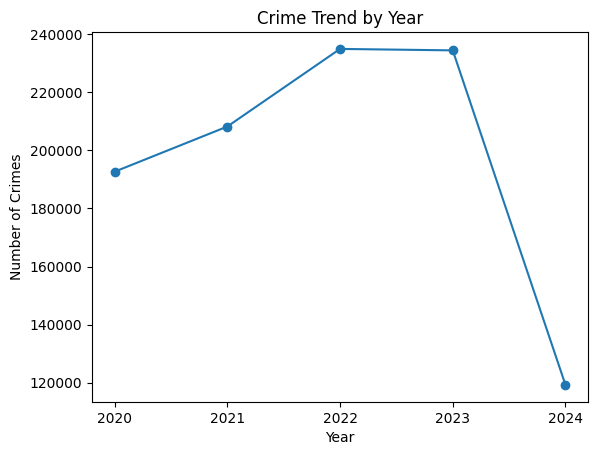

In [35]:
from datetime import datetime

# Extract Year and Month from `date_reported` to analyze trends over time
df['year'] = df['date_reported'].dt.year
df['month'] = df['date_reported'].dt.strftime("%B")

# Plot crime trends by year
crime_by_year = df.groupby('year').size()
crime_by_year.plot(kind='line', marker='o', title='Crime Trend by Year')
plt.xticks(crime_by_year.index)  # Set x-ticks to only the years in the data
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

Crime dropped significantly in 2024

We can check the trends in each year

In [36]:
years = df["year"].unique().tolist()
years.sort()

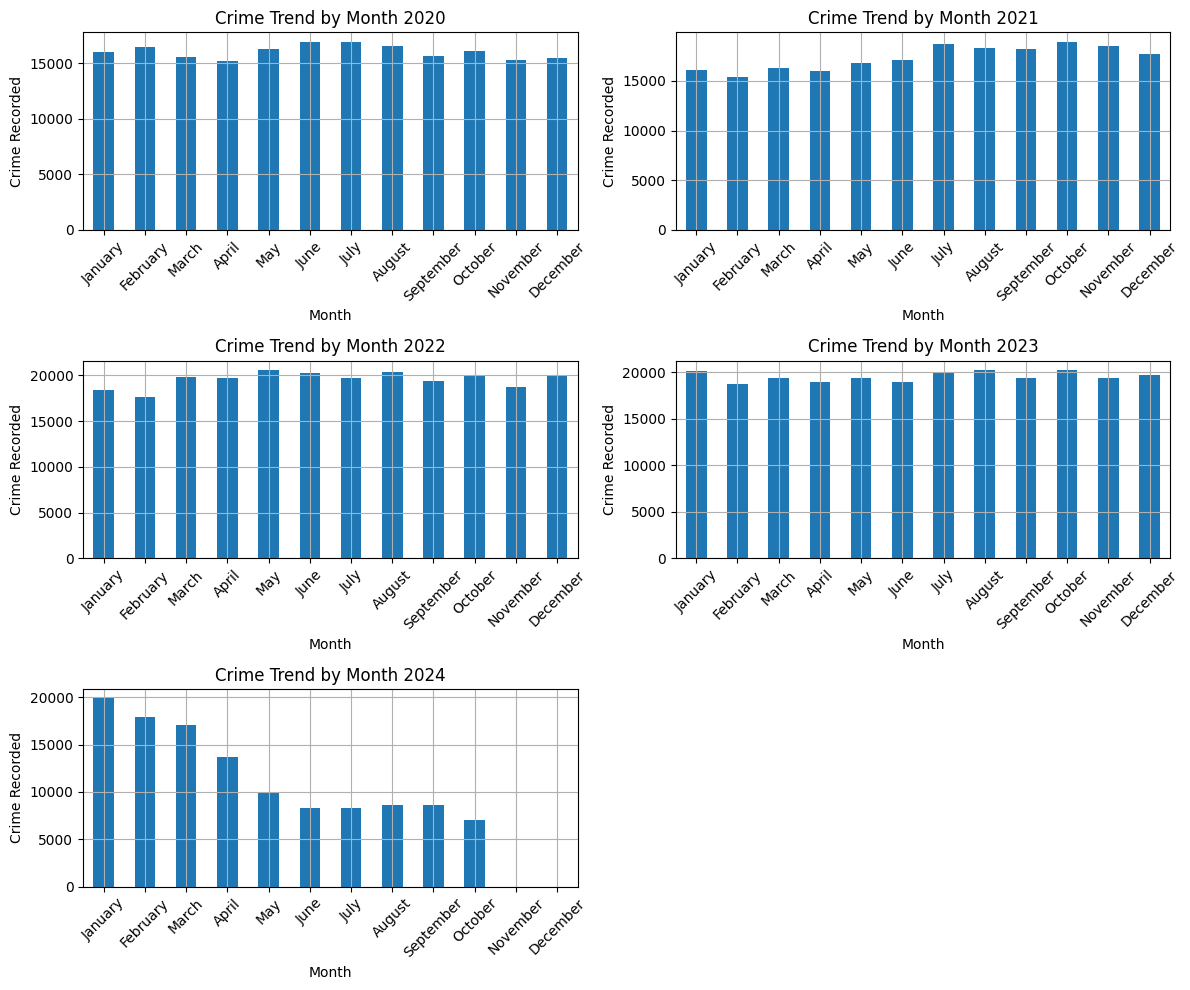

In [37]:
# Create a figure with subplots for each year (4 plots)
plt.figure(figsize=(12, 10))

# Loop through the years and create a subplot for each
for i, year in enumerate(years, start=1):
    plt.subplot(3, 2, i)  # Creates a 2x2 grid of subplots
    crime_by_month = df[df['year'] == year].groupby('month').size().reindex(
        ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December'], fill_value=0
    )
    
    # Plot sales for the year (months on x-axis, sales on y-axis)
    crime_by_month.plot(kind='bar', title= f'Crime Trend by Month {year}')

    # Set the title, labels, and legend
    plt.xlabel('Month')
    plt.ylabel('Crime Recorded')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Show the plots
plt.show()

In [38]:
pd.DataFrame(df['location'].unique(), columns=['location']).shape

(66361, 1)

### Crime Distribution by Area and Premise Caetgory

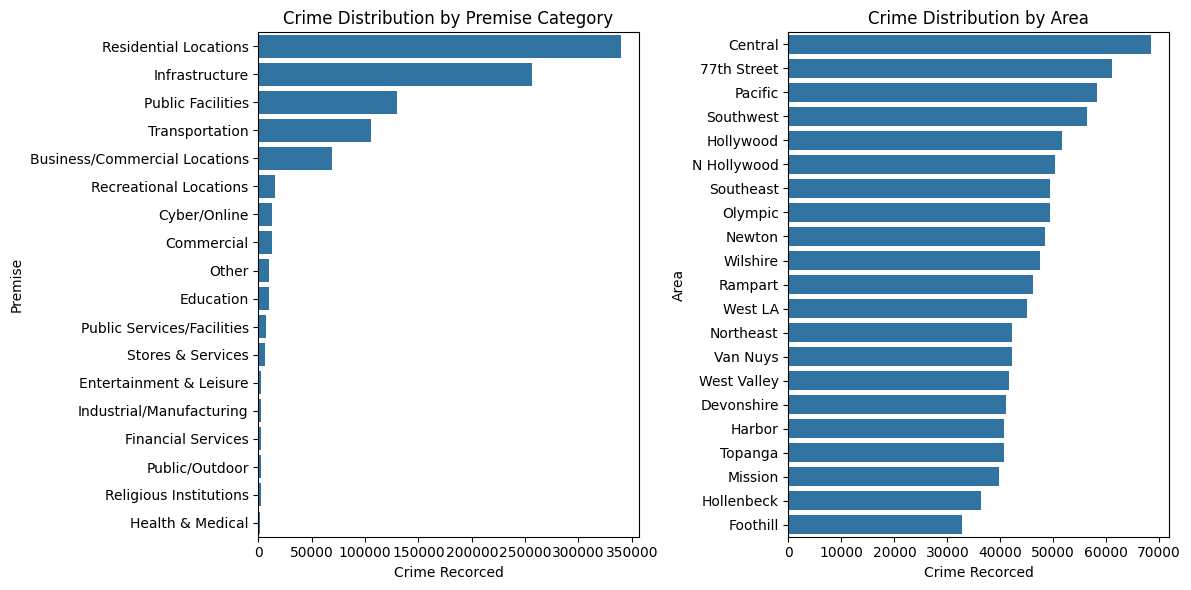

In [39]:
# Group by area_name to get the crime count per premise
crime_by_premise = df.groupby('premise_category').size().reset_index(name='crime_count')

# Group by area_name to get the crime count per premise
crime_by_area = df.groupby('area_name').size().reset_index(name='crime_count')

fig, axes = plt.subplots(1,2, figsize=(12,6))

# Plot crime distribution across different areas
sns.barplot(x='crime_count', y='premise_category', data=crime_by_premise.sort_values(by='crime_count', ascending=False), ax = axes[0])
axes[0].set_title('Crime Distribution by Premise Category')
axes[0].set_xlabel('Crime Recorced')
axes[0].set_ylabel('Premise')


# Plot crime distribution across different areas
sns.barplot(x='crime_count', y='area_name', data=crime_by_area.sort_values(by='crime_count', ascending=False), ax = axes[1])
axes[1].set_title('Crime Distribution by Area')
axes[1].set_xlabel('Crime Recorced')
axes[1].set_ylabel('Area')

plt.tight_layout()

# Show the plots
plt.show()

### Crime Category Analysis

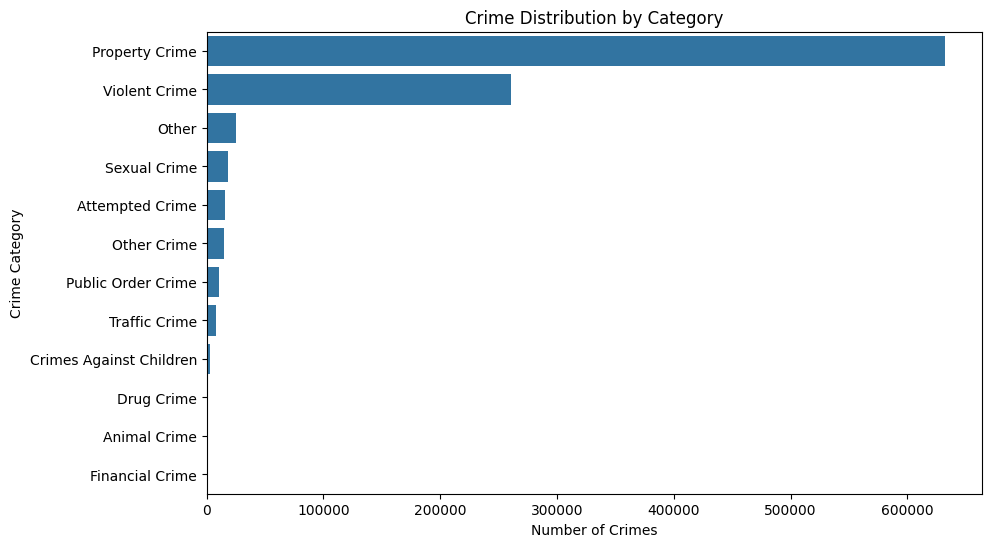

In [40]:
# Group by crime_category to get the crime count per category
crime_category_count = df.groupby('crime_category').size().reset_index(name='crime_count')

# Plot the number of crimes per category
plt.figure(figsize=(10,6))
sns.barplot(x='crime_count', y='crime_category', data=crime_category_count.sort_values(by='crime_count', ascending=False))
plt.title('Crime Distribution by Category')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Category')
plt.show()

it kinda makes sense as most of the crimes occur in residential areas as seen in the previous plot

### Victim Demographics Analysis

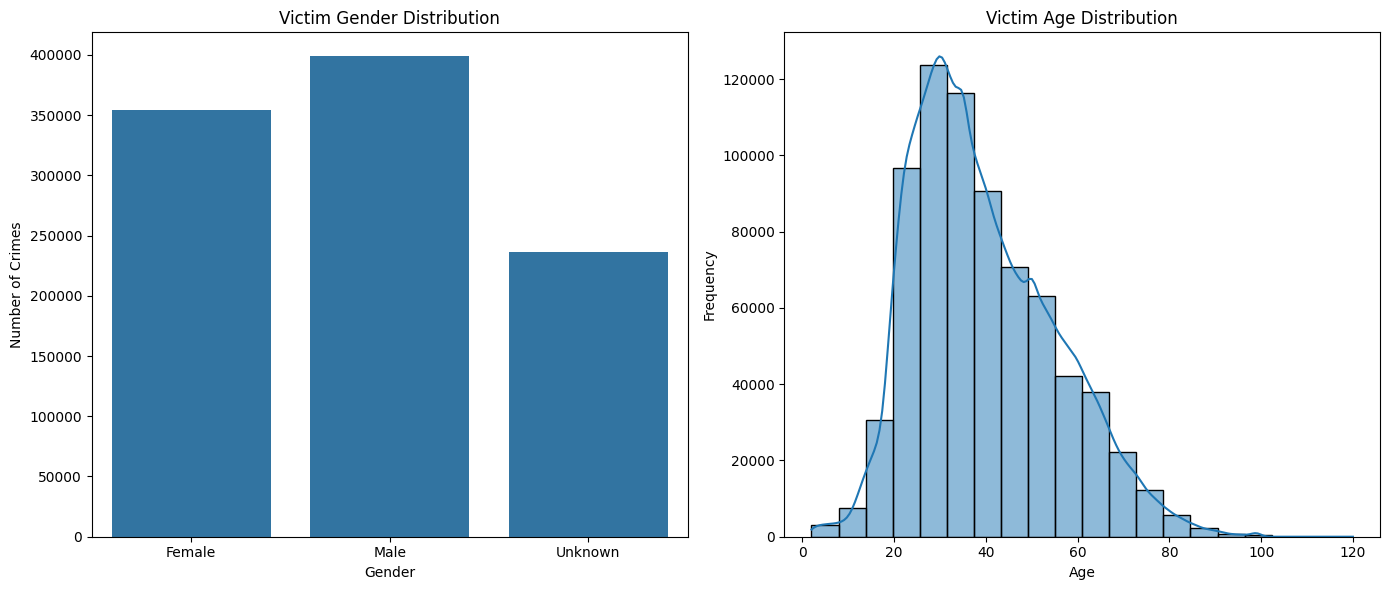

In [41]:
# Analyze the distribution of victims by sex
d_df = df[df["victim_age"] != "Unknown"]
d_df.loc[:,"victim_age"] = pd.to_numeric(df["victim_age"],errors="coerce")
                                   
victim_sex_count = df.groupby('victim_sex', observed=False).size().reset_index(name='crime_count')

# Create the subplot grid (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust the size for better readability

# Plot the distribution of crime by victim sex (first plot)
sns.barplot(x='victim_sex', y='crime_count', data=victim_sex_count, ax=axes[0])
axes[0].set_title('Victim Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of Crimes')

# Plot the age distribution of victims (second plot)
sns.histplot(d_df['victim_age'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Victim Age Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

### Weapons Used in Crimes

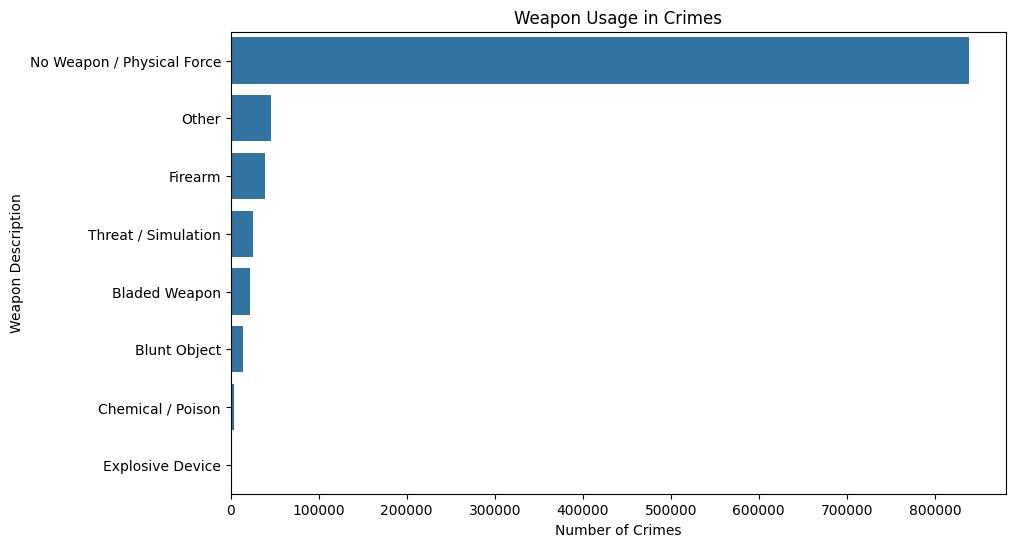

In [42]:
# Group by weapon_description to find how many crimes involved each type of weapon
weapon_usage = df.groupby('weapon_category').size().reset_index(name='crime_count')

# Plot weapon usage
plt.figure(figsize=(10, 6))

# Plot weapon usage
sns.barplot(x='crime_count', y='weapon_category', data=weapon_usage.sort_values(by='crime_count', ascending=False))
plt.title('Weapon Usage in Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Weapon Description')

plt.show()

### Crime Category Against Weapon Category

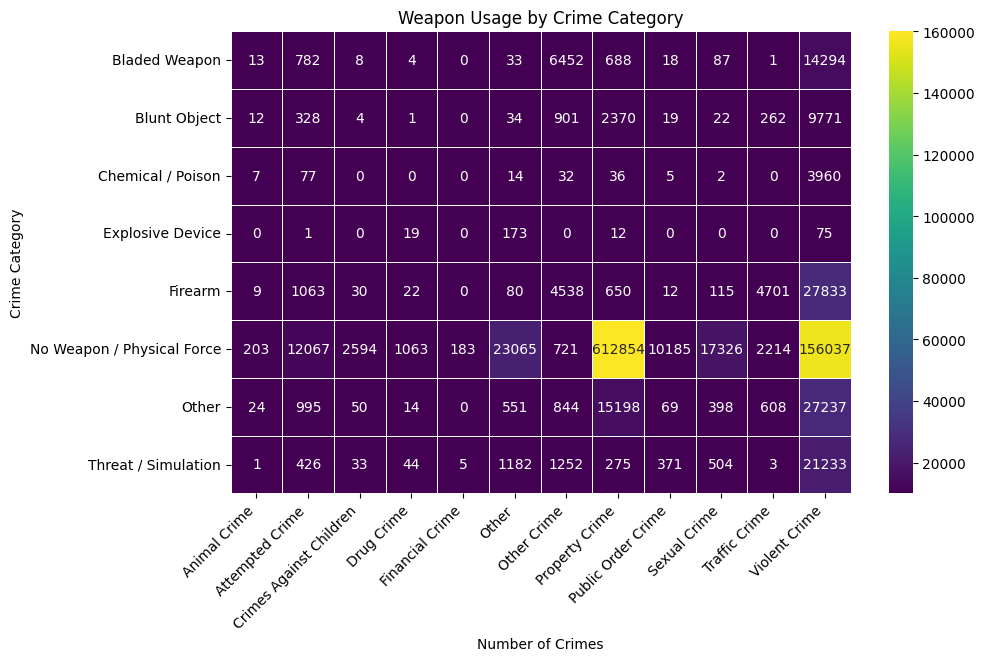

In [44]:
# Prepare the data
weapon_by_category = df.groupby(['crime_category', 'weapon_category']).size().reset_index(name='crime_count')

# Pivot data for heatmap
heatmap_data = weapon_by_category.pivot(index='weapon_category', columns='crime_category', values='crime_count').fillna(0)

# Plot weapon usage
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, vmin=10000, vmax=160000, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)
plt.title('Weapon Usage by Crime Category')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Category')
plt.xticks(rotation = 45, ha="right")
plt.show()

#### Crime Status Analysis

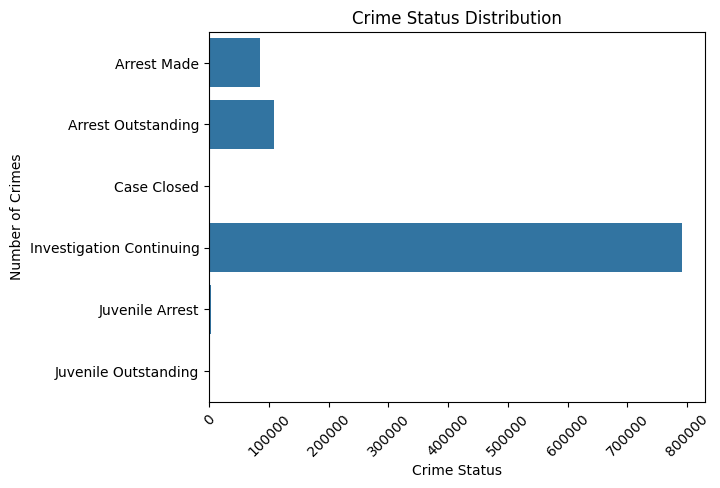

In [45]:
# Group by crime_status_description to find the status of crimes
crime_status_count = df.groupby('crime_status_description').size().reset_index(name='crime_count')

# Plot the crime status distribution
sns.barplot(y='crime_status_description', x='crime_count', data=crime_status_count)
plt.title('Crime Status Distribution')
plt.xlabel('Crime Status')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Group by weapon_description to find how many crimes involved each type of weapon
df[df["weapon_category"]=="Other"].groupby('weapon_description').size().reset_index(name='crime_count')

### Crime Location Analysis

In [ ]:
# Ensure that your dataset contains columns for latitude and longitude
# Replace 'latitude' and 'longitude' with the actual column names from your dataset
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Set the coordinate reference system (CRS) to WGS84 (for lat/lon)
gdf.set_crs("EPSG:4326", inplace=True)


# Plot the data points on a blank map (scatter plot)
plt.figure(figsize=(10, 10))
gdf.plot(marker='o', color='red', markersize=5)
plt.title("LAPD Crime Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()